In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('drug200.csv')  # Replace 'drug200.csv' with your actual CSV file path

# Split into X (features) and y (target variable)
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
print(X)


[[ 1.     0.     1.    ...  0.    23.    25.355]
 [ 0.     1.     0.    ...  0.    47.    13.093]
 [ 0.     1.     0.    ...  0.    47.    10.114]
 ...
 [ 0.     1.     0.    ...  0.    52.     9.894]
 [ 0.     1.     0.    ...  1.    23.    14.02 ]
 [ 1.     0.     0.    ...  1.    40.    11.349]]


In [8]:
from sklearn.tree import DecisionTreeRegressor
regressor  = DecisionTreeRegressor(random_state=42)
regressor.fit(X,y)


DecisionTreeRegressor(random_state=42)

In [9]:
def get_user_input_and_predict():
    age = float(input("Enter age: "))
    sex = input("Enter sex (F/M): ").strip().upper()
    bp = input("Enter BP (LOW/NORMAL/HIGH): ").strip().upper()
    cholesterol = input("Enter cholesterol (NORMAL/HIGH): ").strip().upper()
    na_to_k = float(input("Enter Na_to_K ratio: "))

    # Create input array matching the transformed format
    input_data = np.array([[age, sex, bp, cholesterol, na_to_k]])
    input_transformed = np.array(ct.transform(input_data))

    # Predict using the trained regressor
    predicted_value = regressor.predict(input_transformed).astype(int)

    # Inverse transform to decode back to original labels
    predicted_label = le.inverse_transform(predicted_value)

    print("Predicted drug:", predicted_label[0])

# Call the function to get user input and predict
get_user_input_and_predict()


Enter age: 12
Enter sex (F/M): m
Enter BP (LOW/NORMAL/HIGH): low
Enter cholesterol (NORMAL/HIGH): high
Enter Na_to_K ratio: 19.0
Predicted drug: drugY


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


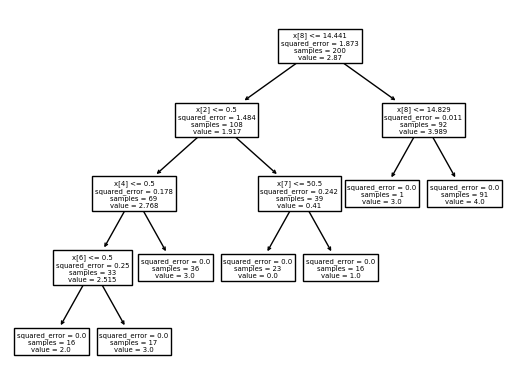

In [11]:
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(regressor)
plt.show()